# Homework N3

### Data Preparations

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #Who needs warnings?

PKR_TO_USD_COEF = 0.0036
INR_TO_USD_COEF = 0.011
CNY_TO_USD_COEF = 0.14
AED_TO_USD_COEF = 0.27

df = pd.read_csv("mobiles_dataset.csv")

#Removing the currencies from the countries since were going to convert them all to USD.
df.rename(columns={"Launched.Price.Pakistan.PKR": "Launched.Price.Pakistan", 
                   "Launched.Price.India.INR": "Launched.Price.India", 
                   "Launched.Price.China.CNY": "Launched.Price.China", 
                   "Launched.Price.USA.USD": "Launched.Price.USA", 
                   "Launched.Price.Dubai.AED": "Launched.Price.Dubai"}, inplace=True)

df["Launched.Price.Pakistan"] =  PKR_TO_USD_COEF * df["Launched.Price.Pakistan"]
df["Launched.Price.India"] =  INR_TO_USD_COEF * df["Launched.Price.India"]
df["Launched.Price.China"] =  CNY_TO_USD_COEF * df["Launched.Price.China"]
df["Launched.Price.Dubai"] =  AED_TO_USD_COEF * df["Launched.Price.Dubai"]
#Idk why but we have two Poco-s which seems to be the same company so i'm fixing it
df["Company.Name"] = df["Company.Name"].apply(lambda x: 'POCO' if x == 'Poco' else x)
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan,Launched.Price.India,Launched.Price.China,Launched.Price.USA,Launched.Price.Dubai,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024


## Part 1: Analytical Questions (Python & R)

### 1. Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?


In [232]:
avg_per_county_capacity = df.groupby('Battery.Capacity.mAh').agg({"Launched.Price.Pakistan": "mean", "Launched.Price.India": "mean", "Launched.Price.China": "mean", "Launched.Price.USA": "mean", "Launched.Price.Dubai": "mean"})
avg_per_county_capacity.reset_index(inplace=True)
avg_per_county_capacity.head()

,Battery.Capacity.mAh,Launched.Price.Pakistan,Launched.Price.India,Launched.Price.China,Launched.Price.USA,Launched.Price.Dubai
0,2000,71.9964,120.989000,125.86,139.0,134.73
1,2227,665.9964,842.233333,783.86,799.0,800.73
2,2300,107.9964,186.989000,181.86,199.0,188.73
3,2438,665.9964,842.233333,783.86,799.0,800.73
4,2600,144.0000,219.890000,265.86,249.0,215.73


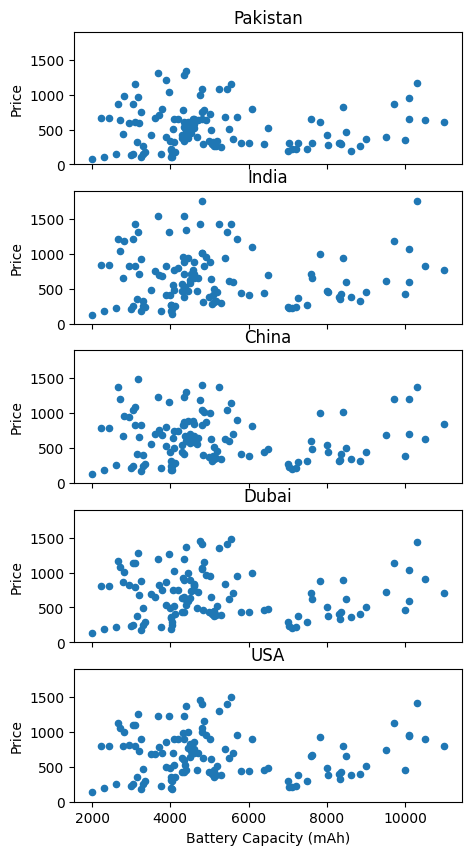

In [233]:
fig, ax = plt.subplots(5, sharex=True)
for index, country in enumerate(['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']):
    avg_per_county_capacity.plot(x='Battery.Capacity.mAh', y=country, kind='scatter', ax=ax[index])
    ax[index].set_title(country[15:])
    ax[index].set_ylabel('Price')
    ax[index].set_ybound(0,1900)
    ax[index].set_xlabel('Battery Capacity (mAh)')
fig.set_size_inches(5, 10)
plt.show();

As we can see from the graphs there are some trends such as the lowest capacity batteries being generally cheaper, but the further we go in all countries the correlation seems to fade since we can see a lot of examples of mid range capacity phones being the same price as high capacity phones. So generally there does not seem to be any concrete correlation. Which is also visible in the  correlation heatmap bellow when we look at the first row or the first column (all of them are very close to 0).

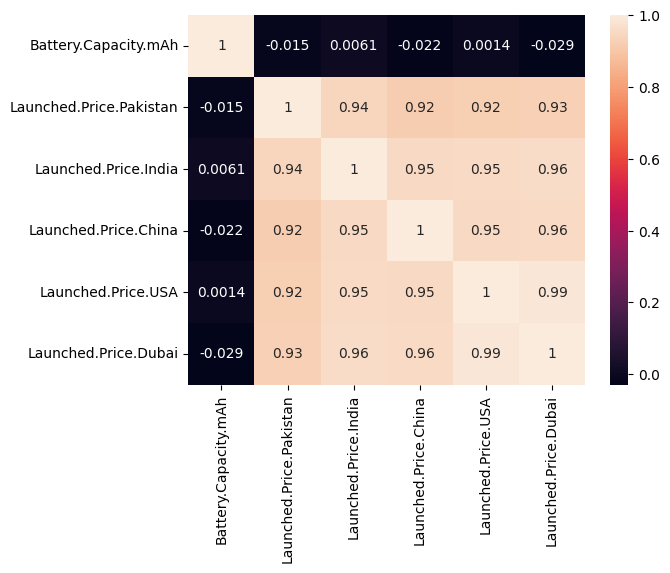

In [234]:
sns.heatmap(avg_per_county_capacity.corr(), annot=True);

### 2. Does RAM size impact the price of smartphones? Check this variability across all currencies. Is there any type of difference between behaviors?


In [235]:
df[df['RAM'] == '8GB / 12GB']

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan,Launched.Price.India,Launched.Price.China,Launched.Price.USA,Launched.Price.Dubai,Launched.Year
638,Huawei,P60 Pro,200g,8GB / 12GB,13MP,48MP (wide) + 13MP (ultrawide) + 48MP (telephoto),Snapdragon 8+ Gen 1 4G,4815,6.67,683.9964,1099.989,1118.32,1099,1133.73,2023
639,Huawei,P60 Art,206g,8GB / 12GB,13MP,48MP (wide) + 40MP (ultrawide) + 48MP (telephoto),Snapdragon 8+ Gen 1 4G,5100,6.73,791.9964,1319.989,1258.32,1299,1295.73,2023


In [236]:
#Since we only have 2 observations where ram is gives as 8GB / 12 GB i will drop them to make the further clean up easier.
ram_df = df[df['RAM'] != '8GB / 12GB']
ram_df["RAM"] = ram_df["RAM"].apply(lambda x: float(x[:-2])) # Remove the GB and convert the col to float


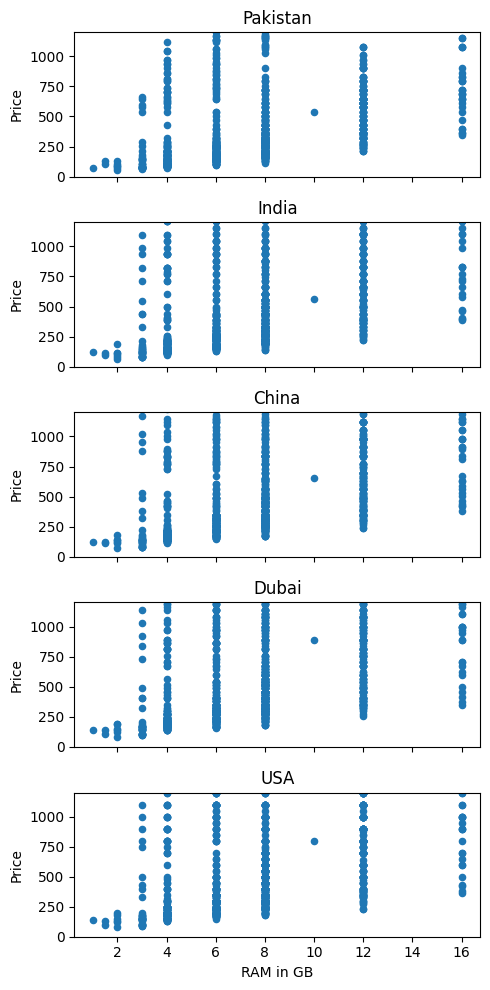

In [237]:
fig, ax = plt.subplots(5, sharex=True)
for index, country in enumerate(['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']):
    ram_df.plot(x='RAM', y=country, kind='scatter', ax=ax[index])
    ax[index].set_title(country[15:])
    ax[index].set_ylabel('Price')
    ax[index].set_xlabel('RAM in GB')
    ax[index].set_ybound(0,1200)
fig.set_size_inches(5, 10)
plt.tight_layout()
plt.show();


It's easy to see that in every country we have some collocation between ram and price. Which is also visible in the  correlation heatmap bellow when we look at the first row or the first column (all of them are 0.45 ish).

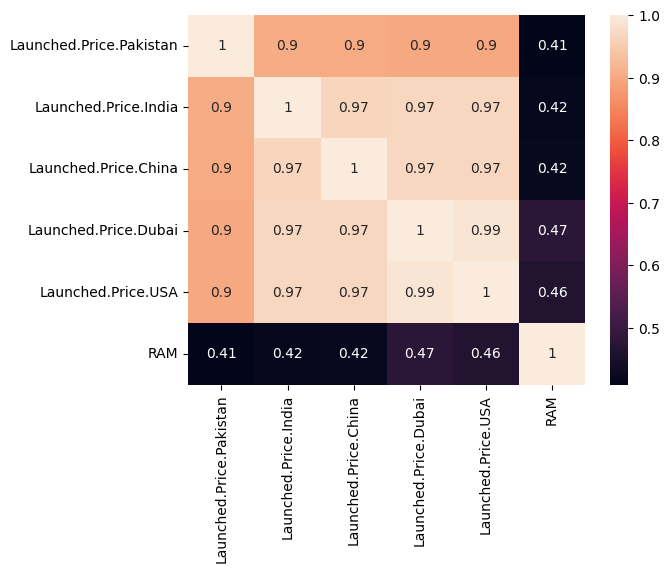

In [238]:
countries_and_ram = ['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA', 'RAM']
sns.heatmap(ram_df[countries_and_ram].corr(), annot=True);

So although there is a correlation it is not very strong and there are not any meaningful differences between countries.

### 3. Do Apple devices have a higher price variation across different regions compared to other brands? In which country do Apple devices have the highest markup? Are there brands with more stable pricing across regions?

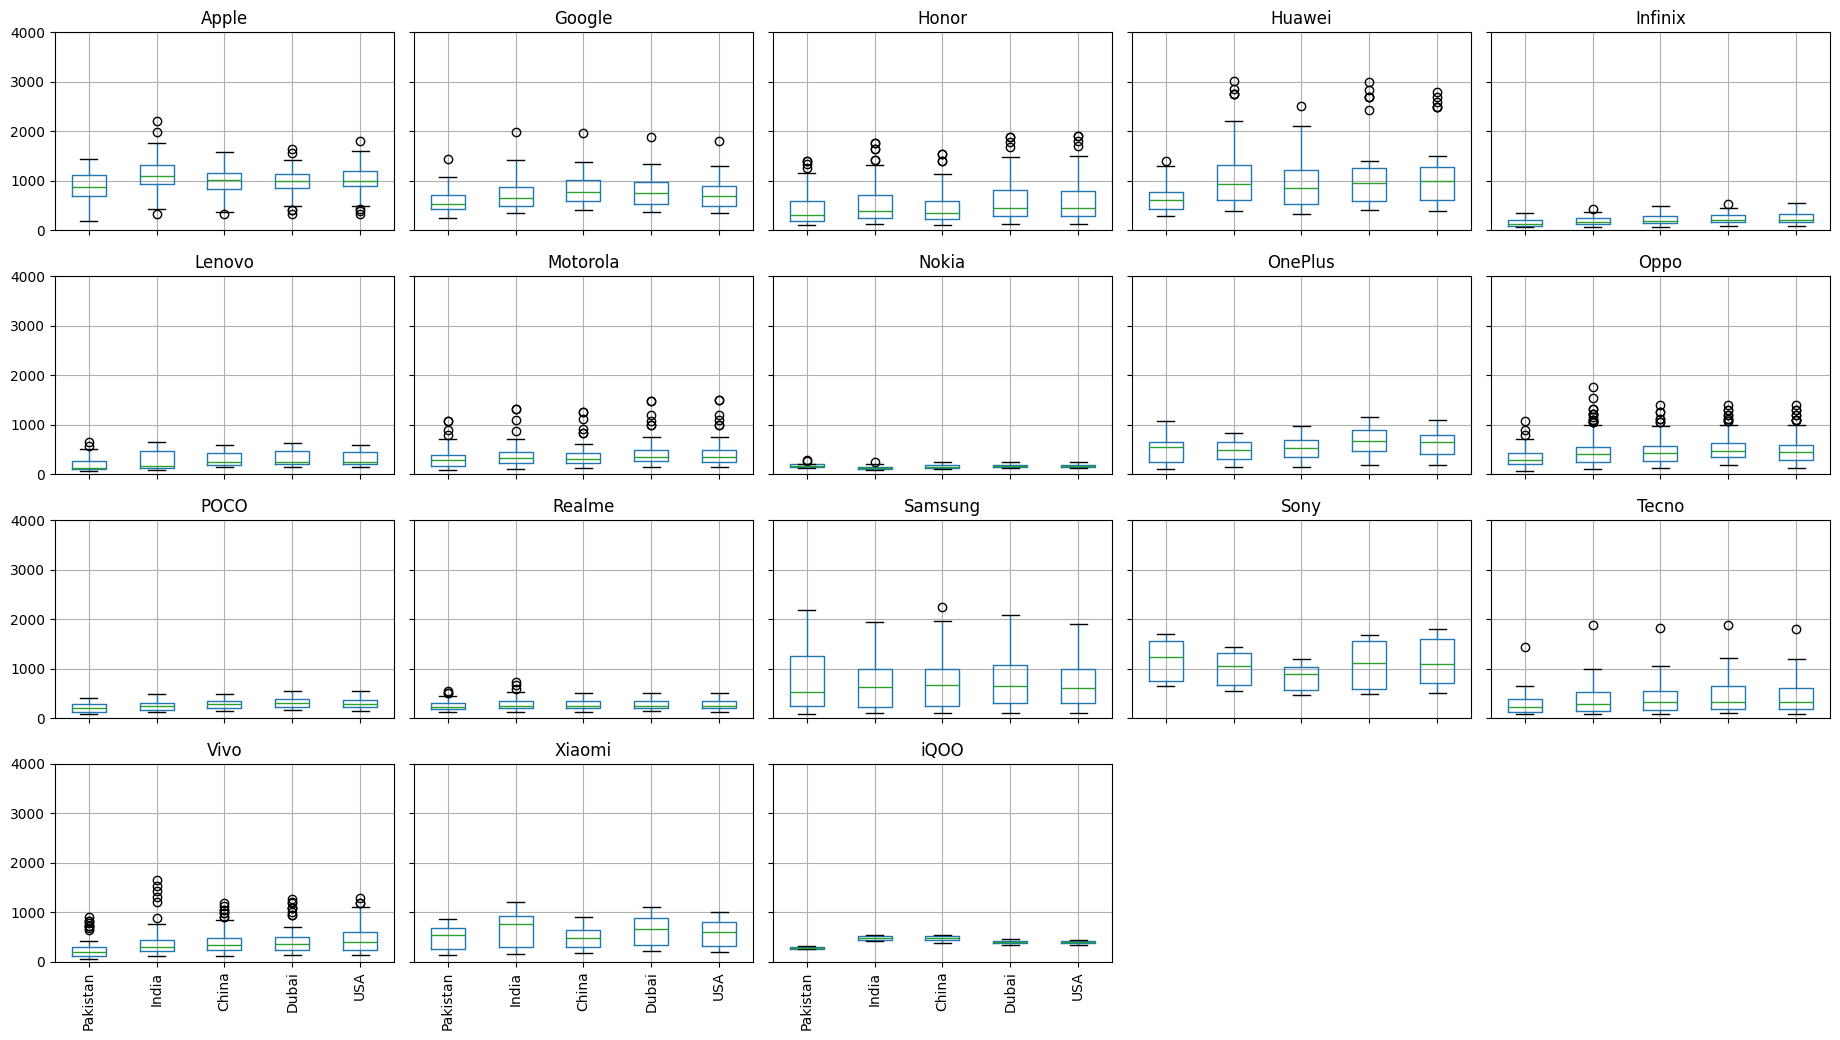

In [239]:
#This took me longer to do that i'd like to admit

groups = df.groupby('Company.Name')
groups_names = list(groups.groups.keys())

#The x ticks are not very presentable in the default function so im extracting the grouped countries to manually change them later.
fig, ax = plt.subplots(4, 5, sharex=True, sharey=True, squeeze=False)
index = 0
for row in range(len(ax)):
    for col in range(len(ax[0])):
        try:
            group = groups.get_group(groups_names[index])
        except:
            break
        group.boxplot(rot=90, column=['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA' ], ax = ax[row][col])
        ax[row][col].set_xticks(range(1,6), ['Pakistan', 'India', 'China', 'Dubai', 'USA'])
        ax[row][col].set_title(f'{groups_names[index]}')
        ax[row][col].set_ybound(0, 4000)
        
        index += 1
        
ax[-1][-1].set_visible(False) # last unused subplot
ax[-1][-2].set_visible(False) # pre last unused subplot
fig.set_size_inches(18.5, 10.5)
plt.tight_layout()
plt.show();


Boxplots can give a very good understanding of variance which is why i grouped by brand each tuple and made 19 graphs each showing different boxplots for different brands for different countries. As we can see the variance of Apple seems to be average among all the other brands with its highest mark-up being in India. \
 Or heres a more analytical approach since we can at a glance which ones are stable but to get some visible numbers behind them we can get average prices for each brand in each region and compare them that way.

In [240]:
averages_of_brands = groups.agg({"Launched.Price.Pakistan": "mean", "Launched.Price.India": "mean", "Launched.Price.China": "mean", "Launched.Price.USA": "mean", "Launched.Price.Dubai": "mean"})
averages_of_brands.std(axis=1).sort_values()

Company.Name
Realme       14.021891
Nokia        14.971358
Samsung      35.889667
Lenovo       36.116443
Infinix      37.591839
Motorola     44.458750
POCO         44.464373
Xiaomi       68.488963
OnePlus      73.837694
Oppo         74.570266
Tecno        74.884578
iQOO         77.863240
Honor        78.554400
Vivo         79.305874
Apple        86.279122
Google       87.467047
Sony        135.139651
Huawei      201.998150
dtype: float64

From here it's much more visible that Apple is above average in it's variance and it's also there is a brand which is very stable such as Realme. 

### 4. Do all smartphone brands have flagship and budget-friendly models, or do some brands only focus on premium devices?


In [241]:
#Im adding a new column to have an average price to work with for this problem
df['Avg.Price'] = (df['Launched.Price.Pakistan'] + df['Launched.Price.India'] + df['Launched.Price.China'] + df['Launched.Price.USA'] + df['Launched.Price.Dubai']) / 5
def compare_func(x):
    if x < 300:
        return 'Budget'
    elif x < 700:
        return 'Mid-Range'
    else:
        return 'Premium'
df['Device.Type'] = df['Avg.Price'].apply(compare_func)
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan,Launched.Price.India,Launched.Price.China,Launched.Price.USA,Launched.Price.Dubai,Launched.Year,Avg.Price,Device.Type
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024,811.31508,Premium
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024,858.71508,Premium
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024,908.91508,Premium
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024,904.11508,Premium
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024,951.51508,Premium


<Axes: xlabel='Company', ylabel='Count'>

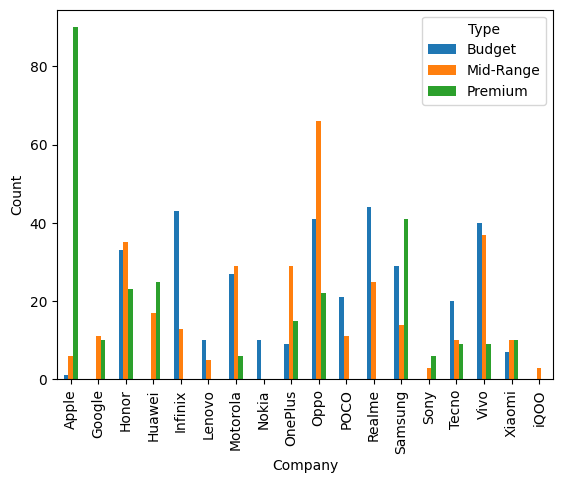

In [242]:
grouped_by_comp_type = df.groupby(['Company.Name', 'Device.Type']).size().unstack(fill_value=0).stack()
grouped_by_comp_type = grouped_by_comp_type.reset_index()
grouped_by_comp_type.columns = ['Company', 'Type', 'Count']
grouped_by_comp_type

grouped_by_comp_type.pivot(index='Company', columns='Type', values='Count').plot(kind='bar', rot=90, ylabel='Count')

As we can see not all of them have budget and premium models. For example we can see that Google does not have a budget phone. There is no brand that focuses only on premium.

### 5. Which region offers the most affordable smartphone prices on average? Are there any brands that price their phones significantly lower in one region compared to others?

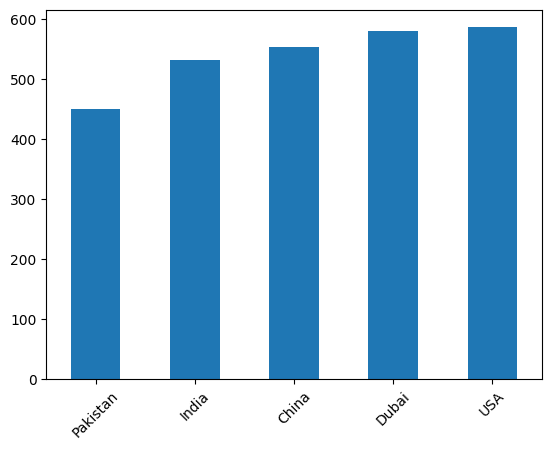

In [243]:
countries = ['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']

ax = df[countries].mean().sort_values().plot(kind='bar', rot=45)
ax.set_xticklabels([x[15:] for x in countries]);

Pakistan offers the most affordable prices on average.

,Company.Name,mean,min,diff,min_country
3,Huawei,942.601952,660.725143,281.876810,Pakistan
13,Sony,1013.294789,835.193333,178.101456,China
1,Google,739.111173,620.567829,118.543344,Pakistan
15,Vivo,371.237779,260.661516,110.576262,Pakistan
9,Oppo,447.149097,341.521981,105.627116,Pakistan


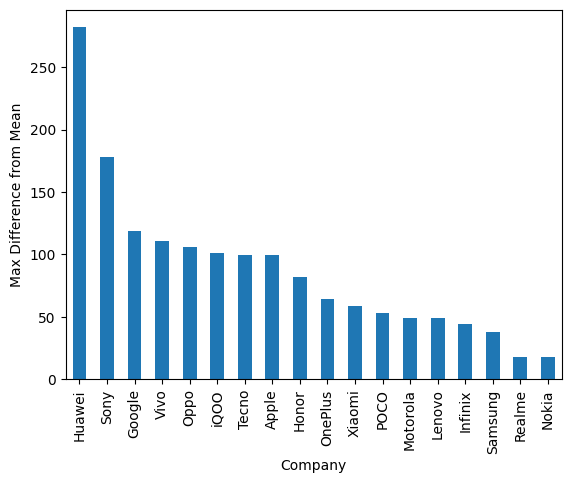

In [244]:
countries = ['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']
avg_per_country_per_brand = df.groupby('Company.Name').agg({countries[0]: 'mean', countries[1]: 'mean', countries[2]: 'mean', countries[3]: 'mean', countries[4]: 'mean'})
avg_per_country_per_brand = avg_per_country_per_brand.reset_index()
avg_per_country_per_brand['min'] = avg_per_country_per_brand.iloc[:,1:].min(axis=1)
avg_per_country_per_brand['mean'] = avg_per_country_per_brand.iloc[:,1:].mean(axis=1)
avg_per_country_per_brand['diff'] = avg_per_country_per_brand['mean'] - avg_per_country_per_brand['min']
avg_per_country_per_brand['min_country'] = avg_per_country_per_brand.iloc[:,1:6].idxmin(axis=1)
avg_per_country_per_brand['min_country'] = avg_per_country_per_brand['min_country'].apply(lambda x: x[15:])
avg_per_country_per_brand = avg_per_country_per_brand.sort_values('diff', ascending=False)
display(avg_per_country_per_brand.head(5)[['Company.Name', 'mean', 'min', 'diff', 'min_country']])
avg_per_country_per_brand.plot(kind='bar', x='Company.Name', y='diff', xlabel='Company', ylabel='Max Difference from Mean', legend='');

I got the mean and min of each country prices based on the brand and got their difference to see which brand prices their phones significantly lower in one region. As we can see Huawei prices their phones in pakistan 281$ cheaper on average than in other places. And the second place goes to Sony which prices their phones in China 178$ cheaper. Most of them price their phones cheapest in Pakistan although there are some exceptions as we can see with Sony.  

## Part 2: Visualization (Python & R)

### 1. Plot a bar chart for average price per region in USD.

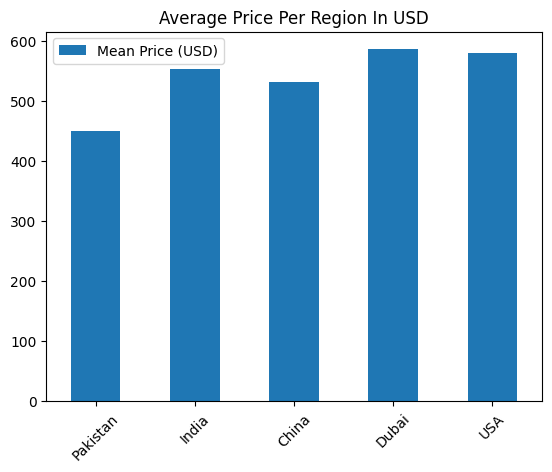

In [245]:
countries = ['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']
bar_df = pd.DataFrame(df[countries].mean()).T
bar_df.index = ['Mean Price (USD)']
bar_df = bar_df.T
bar_df.index = list(bar_df.reset_index()['index'].apply(lambda x: x[15:]))
bar_df.plot(kind='bar', rot=45, title="Average Price Per Region In USD")
plt.show();


### 2. Create a pie chart of the market share of smartphone brands
I think we need data on how many of each model sold to have market share, but since we don't have that i'm just counting how many models each brand has and assuming that each brand sells the same number of each type of phone.

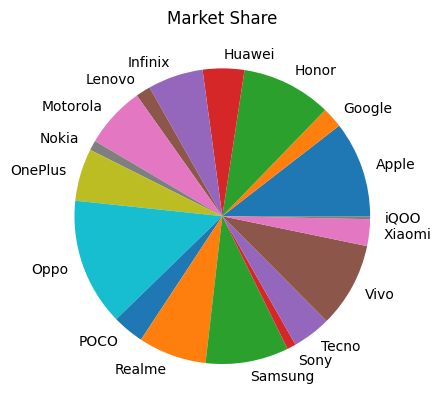

In [246]:
df.groupby('Company.Name').count()['Model.Name'].plot.pie(ylabel='', title='Market Share');

## Part 4: Personal findings Using either R or Python, explain what else affects the prices of mobile phones. Summarize your findings.

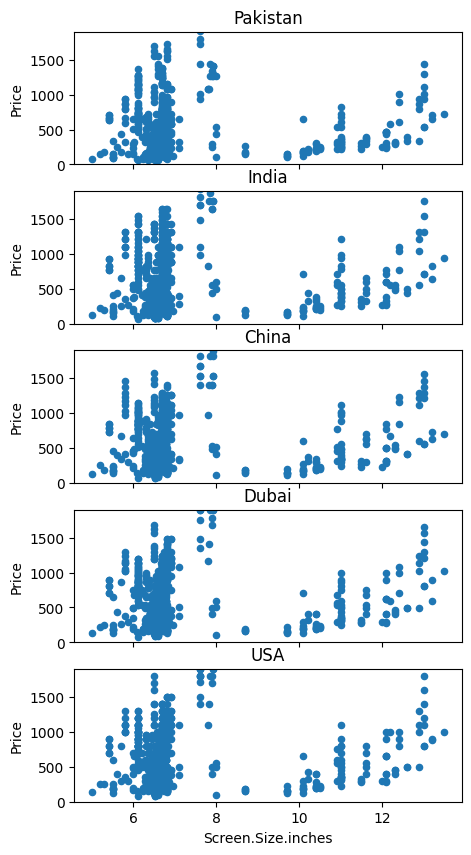

In [247]:
fig, ax = plt.subplots(5, sharex=True)
for index, country in enumerate(['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']):
    df.plot(x='Screen.Size.inches', y=country, kind='scatter', ax=ax[index])
    ax[index].set_title(country[15:])
    ax[index].set_ylabel('Price')
    ax[index].set_ybound(0,1900)
    ax[index].set_xlabel('Screen.Size.inches')
fig.set_size_inches(5, 10)
plt.show();

There does not seem to be any correlation between the screen size and price in any country when it is less than 8 inches. After there there does seem to be some correlation but it is not too strong.

In [248]:
df1 = df
df1['Mobile.Weight'] = df1['Mobile.Weight'].apply(lambda x: float(x[:-1]))


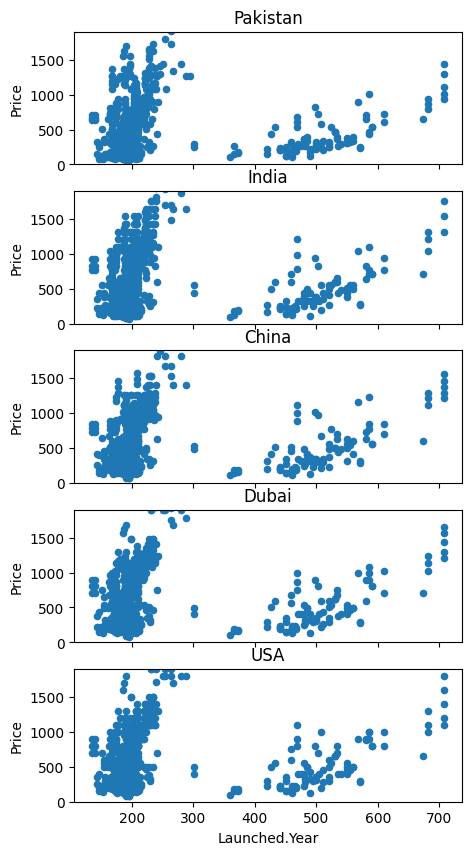

In [249]:
fig, ax = plt.subplots(5, sharex=True)
for index, country in enumerate(['Launched.Price.Pakistan', 'Launched.Price.India', 'Launched.Price.China', 'Launched.Price.Dubai', 'Launched.Price.USA']):
    df1.plot(x='Mobile.Weight', y=country, kind='scatter', ax=ax[index])
    ax[index].set_title(country[15:])
    ax[index].set_ylabel('Price')
    ax[index].set_ybound(0,1900)
    ax[index].set_xlabel('Launched.Year')
fig.set_size_inches(5, 10)
plt.show();

There is no correlation here either. In the heaver phones there are too few points to draw any conclusions and in the lower ones there are no correlations.

Since there are a lot of different processors we can split each processor by their manufacturer(which is the first word in most cases) and try to find a pattern there.

In [250]:
len(df.Processor.unique())

217

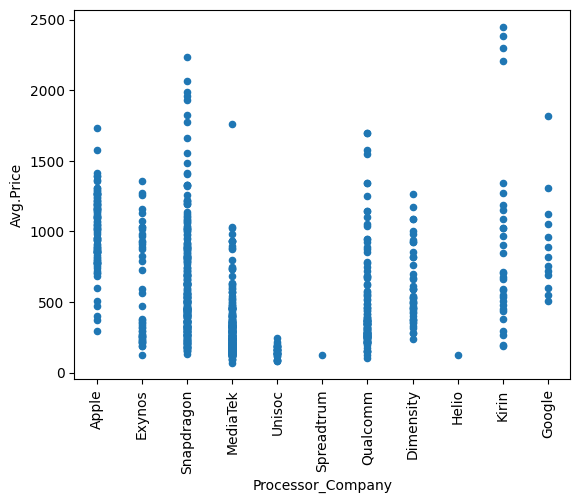

In [251]:
#df['Processor_Model'] = df['Processor'].apply(lambda x: ' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else None)
df['Processor_Company'] = df['Processor'].apply(lambda x: x.split(' ')[0] if 'A1' not in x else x.split(' ')[0][0])
df['Processor_Model'] = df['Processor'].apply(lambda x: x[1:] if x[0]=='A' else (' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else None)) #Fixing specifically Apples genius naming scheme
df['Processor_Company'] = df['Processor_Company'].apply(lambda x: 'Apple' if x == 'A' else x)

df.plot(x='Processor_Company', y='Avg.Price', kind='scatter', rot=90);

Mostly there is no correlation here but we can make some observations such as that. Unisoc and Helio only produces proccesors for budget phones. Apple silicon is mostly in the 700-1300 range and so on. But we can do better if we take into account the specific models we can do better.

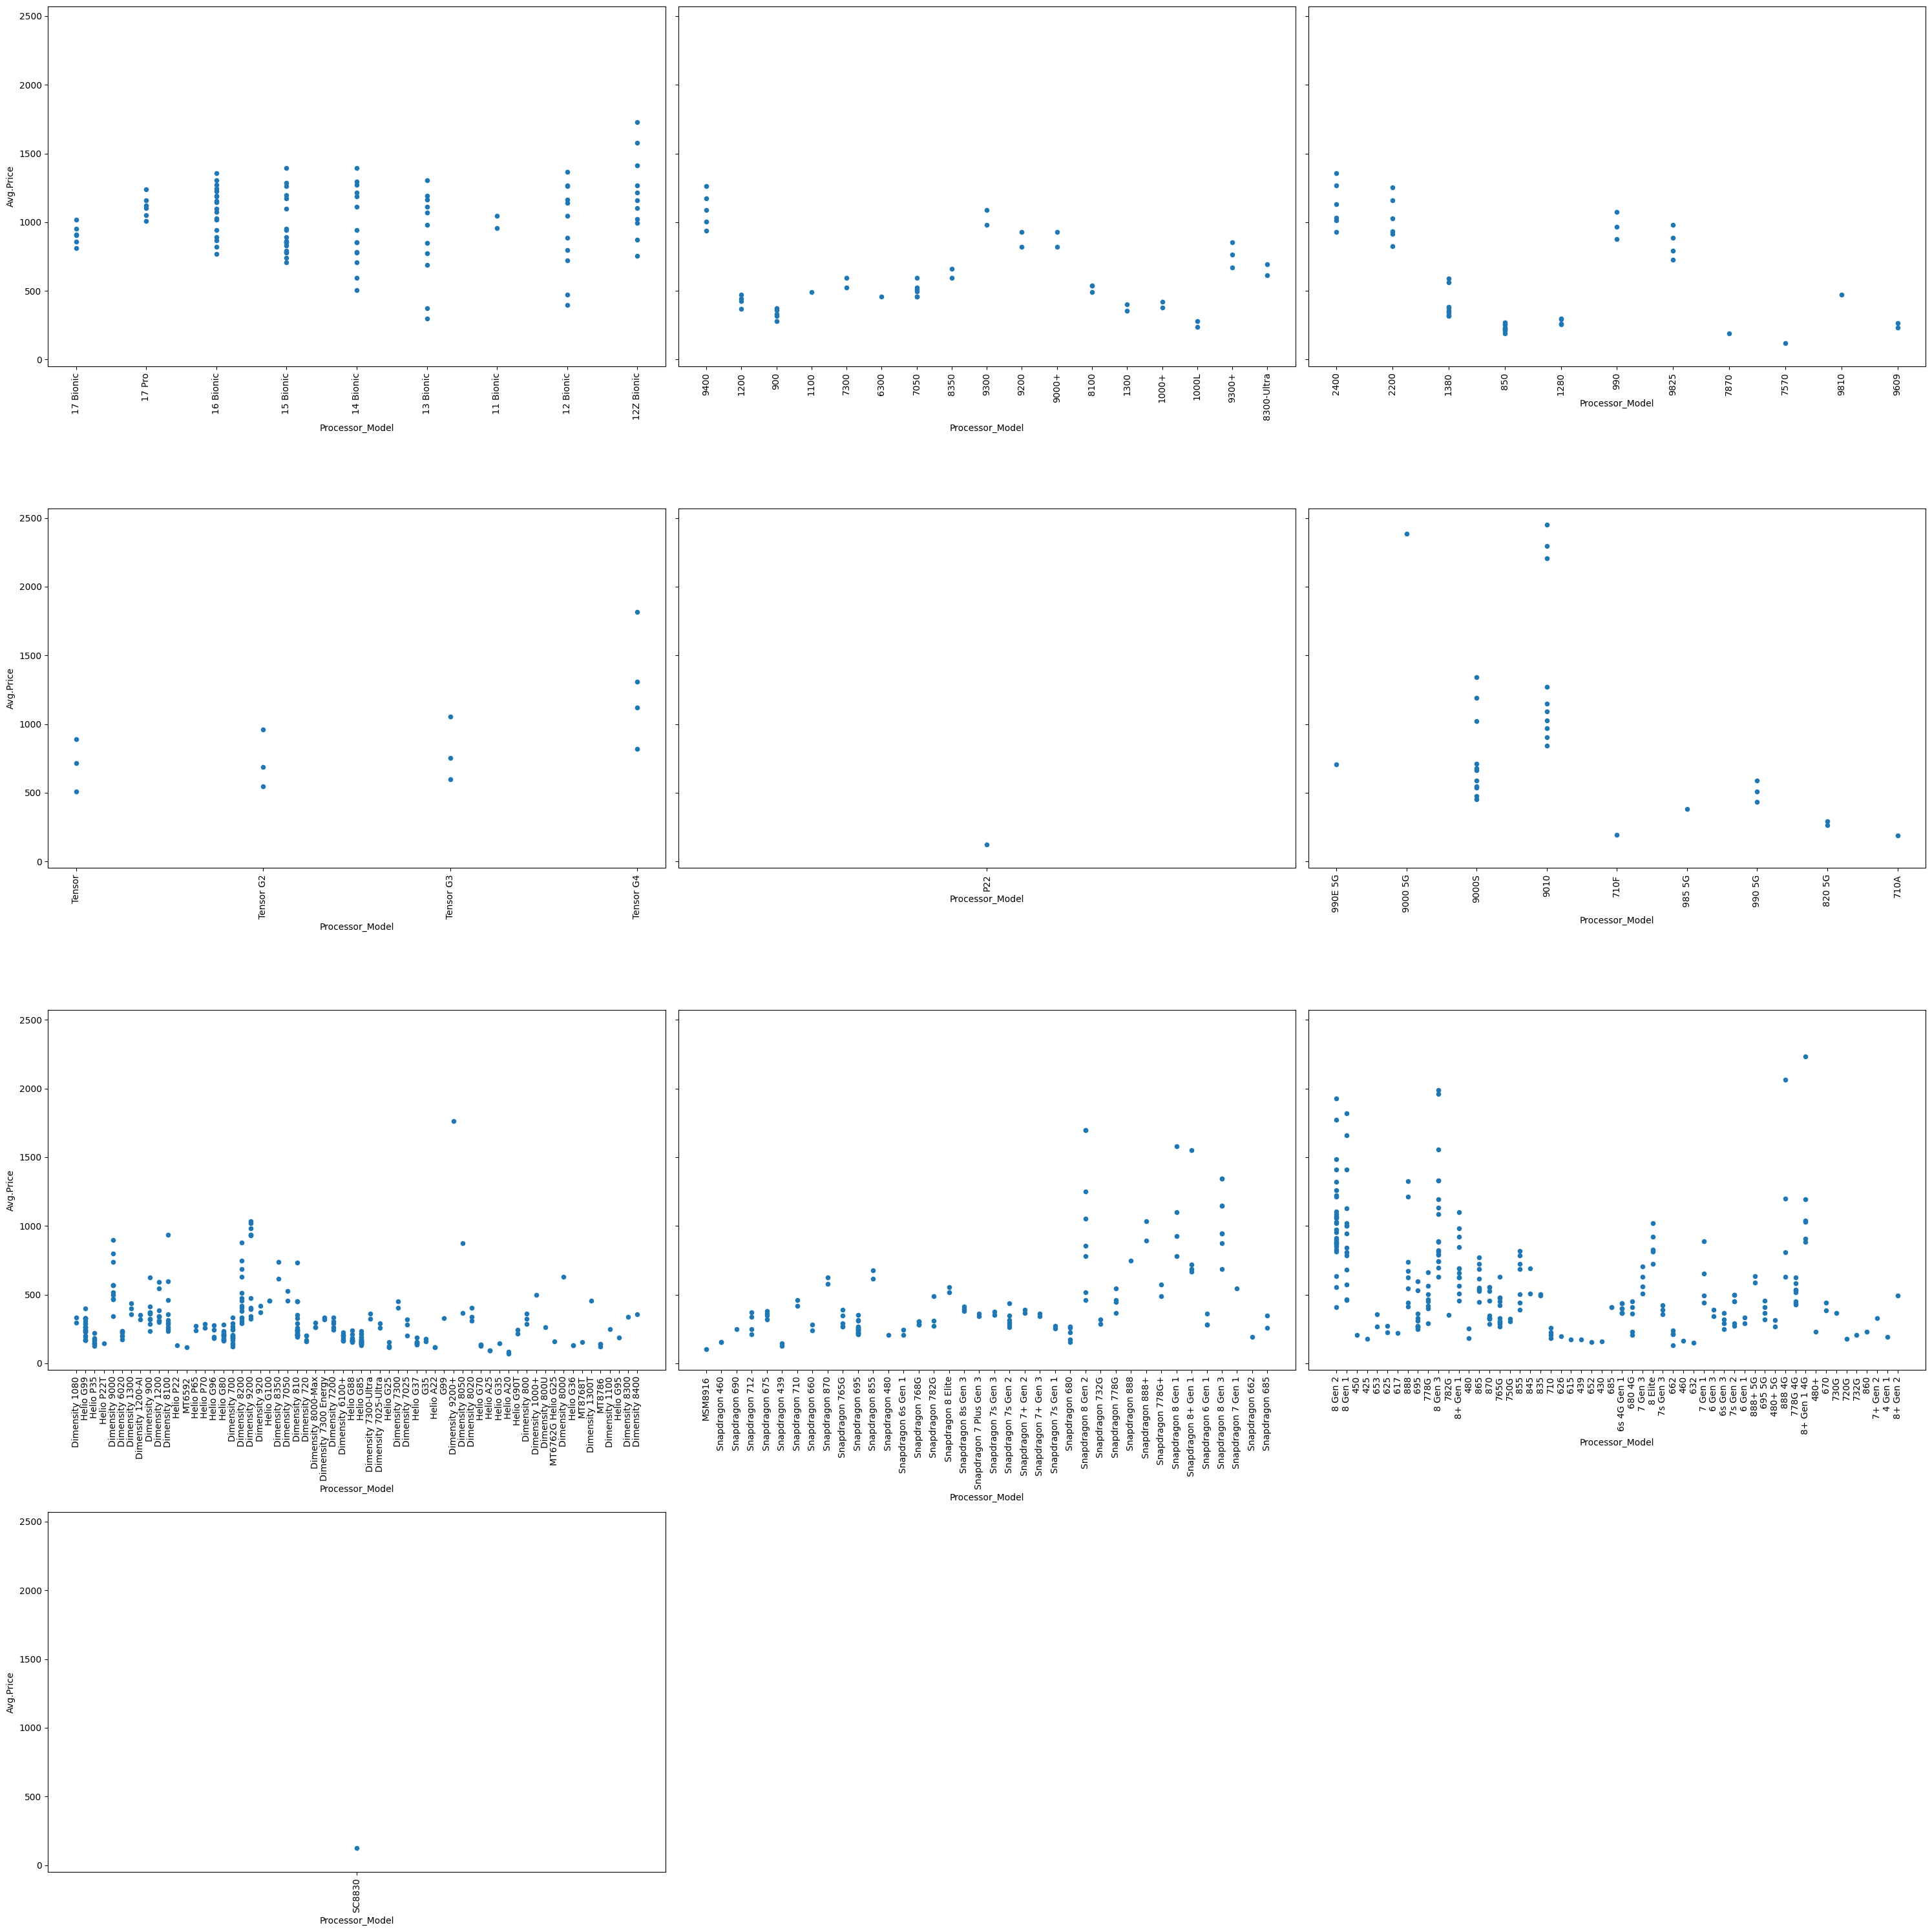

In [252]:
#This took me longer to do that i'd like to admit

groups = df.groupby('Processor_Company')
groups_names = list(groups.groups.keys())

#The x ticks are not very presentable in the default function so im extracting the grouped countries to manually change them later.
fig, ax = plt.subplots(4, 3, sharey=True, squeeze=False)
index = 0
for row in range(len(ax)):
    for col in range(len(ax[0])):
        try:
            group = groups.get_group(groups_names[index])
        except:
            break
        group.plot(rot=90, x='Processor_Model', y='Avg.Price', ax = ax[row][col], kind='scatter') 
        index += 1
        
ax[-1][-1].set_visible(False) # last unused subplot
ax[-1][-2].set_visible(False) # pre last unused subplot
fig.set_size_inches(30, 30)
plt.tight_layout()
plt.show();

From here we can see that although not all processor models have a correlation some do. For example if we squint enough to see 17 Bionic and 17 Pro we can see that 17 Pro is generally more expensive. Same can be said about other models. And some models have a wide range of price with no correlation such as the Snapdragon 8 Gen 2 (3-rd row 3-rd col). It has a wide range of prices so no conclusion can be drawn about the price of a phone from it.